# TP Bubble Raft - à la maison - notebook I


You will continue to work on the bubble raft. First you will focus on how one can characterize the arrangement of bubbles in the raft, in particular the way it deviates from a perfect 2D crystal. For this you will use correlation functions, which you will apply to your images.

## Concept: Correlation functions

A natural and useful way to characterize a spatial arrangement of $N$ particles is through the Pair Correlation Function (PCF):

$g(\vec{r})=\sum_{i\neq j}^N\delta\left(\vec{r}-\vec{r}_{ij}\right)$,

where $\vec{r}_{ij}\equiv\vec{r_i}-\vec{r_j}$ is the relative vector of a particle pair, the $\delta$ is the Dirac delta function, so that the $g$ measures the distribution of distance vectors in the system. If the particle positions $\vec{r}_i$ form a perfect crystal, their relative positions also form a very precise set determined by the geometry of lattice, so that the $g(\vec{r})$ will have sharp peaks at a discrete set of values of $\vec{r}$. As the particles deviate from the perfect lattice positions due to elastic deformations but even more due to defects such as dislocations, grain boundaries, interstitials and others, the $g(\vec{r})$ becomes smoother with wide peaks. As the crystal becomes more disordered and eventually melts into a liquid, the $g$ becomes flat and featureless for larger $|\vec{r}|$, i.e., the pair correlations are diminished: knowing position of one particle we cannot predict where any distant particle should be, the regularity in positions is lost.

The pair correlation function is measured quite directly in essential experiments of condensed matter physics! Some key experiments for studying material structure are elastic scattering experiments, in which some quantum particles (X-rays, neutrons, electrons) are shot at the material and then observed at the same energy but scattered by a vector $\vec{q}$. To illustrate the connection to $g$, one may assume weak scattering without absorption, where particles in the system are identical and isotropic. Then a particle at position $\vec{r}_i$ creates a scattered plane-wave $b\exp{(i\vec{q}\cdot\vec{r}_i)}$, and the total scattered wave is $\psi_q=b\sum_i^N\exp{(i\vec{q}\cdot\vec{r}_i)}$, so the scattered intensity measured in the experiment is $I_q=\psi_q^*\psi_q=|b|^2\sum_{i,j}^N\exp{(i\vec{q}\cdot(\vec{r}_i-\vec{r}_j))}$. One therefore defines the central quantity $S(\vec{q})$, the *static structure factor*, by:

$S(\vec{q})\equiv\frac{1}{N}\sum_{i,j}^N e^{i\vec{q}\cdot(\vec{r}_i-\vec{r}_j)}=1+\frac{1}{N}\int dV e^{i\vec{q}\cdot\vec{r}}g(\vec{r})$,

where the connection to the pair correlation function is shown by simple use of the Dirac delta function. It turns out that the structure factor measured by scattering is given by the Fourier transform of the pair correlation function (note, the full technical definitions of these quantities differ slighlty from this simplifed description).

For simplicity, one correlation function we will focus on measures only the distances between particles, i.e., $\vec{r}_{ij}$ is replaced by its length $|\vec{r}_{ij}|$ in the definition of $g$:

$g_{\textrm{dist}}(r)=\sum_{i\neq j}^N\delta\left(r-|\vec{r}_{ij}|\right)$,

see for further details https://en.wikipedia.org/wiki/Radial_distribution_function .

The $g_{\textrm{dist}}$ essentially measures whether a *translation* of a particle a certain distance away is likely to land on another particle. A complementary correlation function instead measures whether a *rotation* of a bond between particles by a certain angle lands on another bond. More precisely:

$g_{\textrm{angle}}(r)=\left|\sum_{a,b}^{\textrm{NN pairs}}\delta\left(r-|\vec{R}_a-\vec{R}_b|\right)e^{6i(\theta_a-\theta_b)}\right|$,

where $\vec{R}_a\equiv(\vec{r_i}+\vec{r_j})/2$ is the center-of-mass of a nearest-neighbor pair of particles, the angle $\theta_a$ is the one formed by their link $\vec{r}_{ij}$ with the global x-axis. In a perfect triangular lattice a particle has 6 nearest-neighbors, and the angles of these 6 links to some global axis are $\theta_0+n\cdot2\pi/6$, $n=0,...,5$, so that all links contribute identically to the exponent, namely $e^{6i\theta_0}$. As the lattice becomes imperfect, the correlation function $g_{\textrm{angle}}(r)$ measures the matching of the local rotation angles $\theta_0$ between particles separated by a distance $r$.

The distinction between $g_{\textrm{dist}}(r)$ and $g_{\textrm{angle}}(r)$ is especially interesting in 2D, in which ordinary crystals have peculiar properties: at large lengthscales $r$ the former correlation function decays as power-law because of disorder caused by occasional dislocation topological defects, while the latter correlation function is constant (local six-fold axes are oriented the same way in entire system). The proliferation of dislocation defects as temperature rises leads to *liquid-crystal* phases, in which the $g_{\textrm{dist}}(r)$ decays exponentially with $r$, while $g_{\textrm{angle}}(r)$ as power-law. At even higher temperatures other defects proliferate in the system and the crystal has melted into a liquid with all correlations decaying exponentially quickly.

## This notebook

You will start by loading images of your bubble raft: at least two images, one with many grains and defects, and one with as few as possible. You will also generate an image of a perfect triangular lattice to act as a reference perfect crystal. Using these images you will:

    - Learn how two pair correlation functions look like for a crystal
    - Understand how lattice defects influence the pair correlations
    - Attempt to qualify the crystal nature of your bubble raft




## Load packages and initialize functions

In [1]:
!pip install opencv-python    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.collections

In [2]:
#############################################################################################################
                                    #### FUNCTIONS ####
#############################################################################################################    
def pairCorrelationFunction_2D(x, y, S, rMax, dr):
    # taken from  @cfinch Github #
    """Compute the two-dimensional pair correlation function, also known
    as the radial distribution function, for a set of circular particles
    contained in a square region of a plane.  This simple function finds
    reference particles such that a circle of radius rMax drawn around the
    particle will fit entirely within the square, eliminating the need to
    compensate for edge effects.  If no such particles exist, an error is
    returned. Try a smaller rMax...or write some code to handle edge effects! ;)
    Arguments:
        x               an array of x positions of centers of particles
        y               an array of y positions of centers of particles
        S               length of each side of the square region of the plane
        rMax            outer diameter of largest annulus
        dr              increment for increasing radius of annulus
    Returns a tuple: (g, radii, interior_indices)
        g(r)            a numpy array containing the correlation function g(r)
        radii           a numpy array containing the radii of the
                        annuli used to compute g(r)
        reference_indices   indices of reference particles
        
   
    """
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram
    # Number of particles in ring/area of ring/number of reference particles/number density
    # area of ring = pi*(r_outer**2 - r_inner**2)

    # Find particles which are close enough to the box center that a circle of radius
    # rMax will not cross any edge of the box
    bools1 = x > rMax
    bools2 = x < (S - rMax)
    bools3 = y > rMax
    bools4 = y < (S - rMax)
    interior_indices, = where(bools1 * bools2 * bools3 * bools4)
    num_interior_particles = len(interior_indices)

    if num_interior_particles < 1:
        raise  RuntimeError ("No particles found for which a circle of radius rMax\
                will lie entirely within a square of side length S.  Decrease rMax\
                or increase the size of the square.")

    edges = arange(0., rMax + 1.1 * dr, dr)
    num_increments = len(edges) - 1
    g = zeros([num_interior_particles, num_increments])
    radii = zeros(num_increments)
    numberDensity = len(x) / S**2

    # Compute pairwise correlation for each interior particle
    for p in range(num_interior_particles):
        index = interior_indices[p]
        d = sqrt((x[index] - x)**2 + (y[index] - y)**2)
        d[index] = 2 * rMax

        (result, bins) = histogram(d, bins=edges, normed=False)
        g[p, :] = result/numberDensity

    # Average g(r) for all interior particles and compute radii
    g_average = zeros(num_increments)
    for i in range(num_increments):
        radii[i] = (edges[i] + edges[i+1]) / 2.
        rOuter = edges[i + 1]
        rInner = edges[i]
        g_average[i] = mean(g[:, i]) / (pi * (rOuter**2 - rInner**2))

    return (g_average, radii, interior_indices)
#############################################################################################################
def thetaCorrelationFunction_2D(x, y, theta, S, rMax, dr):
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram

    bools1 = x > rMax
    bools2 = x < (S - rMax)
    bools3 = y > rMax
    bools4 = y < (S - rMax)
    interior_indices, = where(bools1 * bools2 * bools3 * bools4)
    num_interior_particles = len(interior_indices)

    if num_interior_particles < 1:
        raise  RuntimeError ("No particles found for which a circle of radius rMax\
                will lie entirely within a square of side length S.  Decrease rMax\
                or increase the size of the square.")

    edges = arange(0., 2*rMax + 1.1 * dr, dr)
    num_increments = len(edges) - 1
    g = zeros([num_interior_particles, num_increments])
    radii = zeros(num_increments)
    numberDensity = len(x) / S**2

    # Compute pairwise correlation for each interior particle
    for p in range(num_interior_particles):
        index = interior_indices[p]
        d = sqrt((x[index] - x)**2 + (y[index] - y)**2)
        d[index] = 2 * rMax
        G = np.conjugate(theta[index])*theta

        #(result, bins) = histogram(d, bins=edges, normed=False)
        #g[p, :] = result/numberDensity
        for a in range(len(d)-1):
            ival=int(d[a]/dr)
            if ival<len(edges)-1:
                g[p, ival] = G[a]

    # Average g(r) for all interior particles and compute radii
    g_average = zeros(num_increments)
    for i in range(num_increments):
        radii[i] = (edges[i] + edges[i+1]) / 2.
        rOuter = edges[i + 1]
        rInner = edges[i]
        g_average[i] = abs(mean(g[:, i]) / (pi * (rOuter**2 - rInner**2)))

    return (g_average, radii, interior_indices)

#############################################################################################################
def ImageParams(img, relScale):
    out = img.copy()
    hei, wid = img.shape[:2]
    maxR = int(1.1*(wid/relScale)/2)
    minR = int(0.9*(wid/relScale)/2)
    return out, hei, wid, maxR, minR

#############################################################################################################
def HoughPlot(img, out, minR, maxR, imSize):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(image=gray,method=cv2.HOUGH_GRADIENT,dp=1.6,minDist=2*minR,param1=5,param2=5,minRadius=minR,maxRadius=maxR)
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circlesRound = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circlesRound:
            cv2.circle(out, (x, y), r, (0, 255, 0), 3)
        plt.figure(figsize = (imSize,imSize))
        plt.imshow(out)
    else:
        print ('No circles found')
    return circlesRound
#############################################################################################################
def generateTriangularLattice(N):
    a = 40*np.array([1,0])
    b = 40*np.array([1/2, np.sqrt(3)/2])
    triangularLattice = np.zeros((N*N,2))
    for i in range(N):
        for j in range(N):
            triangularLattice[N*i+j] = i*a + j*b
    return triangularLattice

#############################################################################################################
def getTheta(xy,radius):
    xList = np.empty([0,1])
    yList = np.empty([0,1])
    thetaList = np.empty([0,1])
    NNmaxDiam = 1.3*2*radius
    for i in range(len(xy)-1):
        for j in range(i+1,len(xy)):
            if ((xy[i,0]-xy[j,0])**2 + (xy[i,1]-xy[j,1])**2) < NNmaxDiam**2:
                xList= np.append(xList,(xy[i,0]+xy[j,0])/2)
                yList =np.append(yList,(xy[i,1]+xy[j,1])/2)
                thetaList = np.append(thetaList, np.exp(1j*6*np.arctan2((xy[i,1]-xy[j,1]),(xy[i,0]-xy[j,0]))))                
    return xList, yList, thetaList

# Images

Load images you made during the experiment. You can choose as many as you want but at least two, one where there are several grains and defects and one with more or less perfect crystal (you might need to crop images in ImageJ). **The number parameter that is passed to the ImageParams function is rougly the number of bubbles along the x-axis.**

In [3]:
# note that you have to put the correct path to your files. In the colab, once you located your 
# files you can click on the three dots to the right of the name and copy the path, and then you can paste 
# it instead of the "./images/testNew.png" etc.

imageBig = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/MecaTP/images/testNew.png')
imageSmall = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/MecaTP/images/testNew.png')

# the last number that is passed to the ImageParams function is roughly the number of bubbles along the x-axis. 
outputBig, heightBig, widthBig, maxRadiusBig, minRadiusBig = ImageParams(imageBig, 60)
outputSmall, heightSmall, widthSmall, maxRadiusSmall, minRadiusSmall = ImageParams(imageSmall, 30)

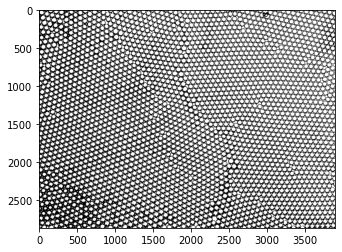

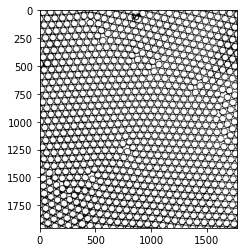

In [16]:
plt.imshow(imageBig)
plt.show()
plt.imshow(imageSmall)
plt.show()

Use **HoughPlot** function to detect bubbles in your experimental images. The last parameter that is passed to the function is size of the ouput image.

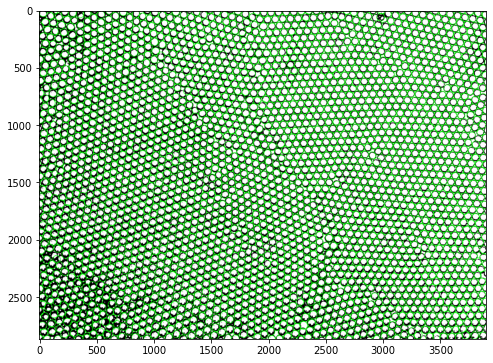

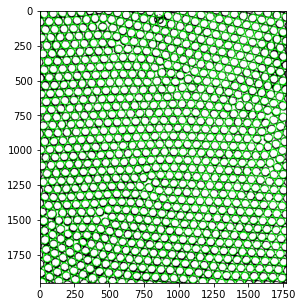

In [5]:
circlesRoundBig = HoughPlot(imageBig, outputBig, minRadiusBig, maxRadiusBig, 8)
circlesRoundSmall = HoughPlot(imageSmall, outputSmall, minRadiusSmall, maxRadiusSmall, 5)

Now use the function **generateTriangularLattice** to generate a triangular lattice. The number passed to the function is its linear size.

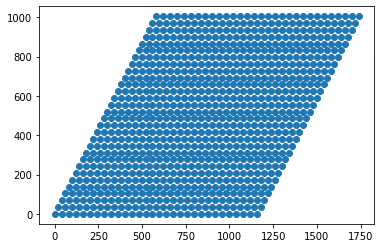

In [6]:
TriangLatt = generateTriangularLattice(30)
widthLattice = int(max(TriangLatt[:,0]))
plt.scatter(TriangLatt[:,0],TriangLatt[:,1])

# Pair correlation: Distance

Calculate the pair correlation function $g_{\textrm{dist}}(r)$ using the preprogrammed function **pairCorrelationFunction_2D**. Apart from the coordinates of the bubble centers/lattice points, you also need to pass to the function the value $D$ of diameter of the largest annulus in which the correlation will be calculated (i.e., the maximal value of $r$ is $D/2$), as well as the increment for increasing the radius of annulus. Note, if a particle is closer to an edge of the system than $D/2$, it is not used at all in calulation of $g_{\textrm{dist}}(r)$. You can experiment with the input parameters until your scales for all three different systems match and can be plotted on the same plot.

In [12]:
## note that the D in the first two imates is taken to be 500. Depending on your images you might have to 
## adjust this number. The best strategy is to start smaller, say 50 and then increase until you get an error
## message that no circles can be found. 
## there is no need to change the setting for the lattice. 

gaverageBig, radiiiBig, interior_indicesBig = pairCorrelationFunction_2D(circlesRoundBig[:,0], \
                                                                         circlesRoundBig[:,1], \
                                                                         widthBig, 500, 1)
gaverageSmall, radiiiSmall, interior_indicesSmall = pairCorrelationFunction_2D(circlesRoundSmall[:,0], \
                                                                               circlesRoundSmall[:,1], \
                                                                               widthSmall, 500, 1)
gaverageLattice, radiiiLattice, interior_indicessLattice = pairCorrelationFunction_2D(TriangLatt[:,0], \
                                                                                      TriangLatt[:,1], \
                                                                                      widthLattice, 300, 0.6)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:57: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.


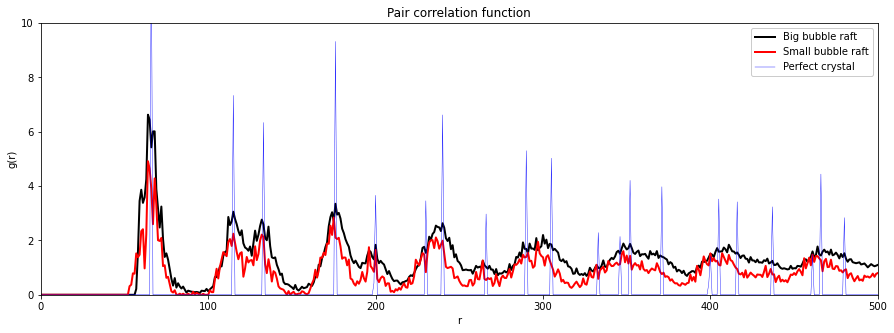

In [13]:
plt.figure(figsize = (15,5))
plt.xlim([0, 500])
plt.ylim([0, 10])
plt.xlabel("r")
plt.ylabel("g(r)")
plt.title('Pair correlation function')
plt.plot(gaverageBig, 'k', linewidth=2, label='Big bubble raft')
plt.plot(gaverageSmall, 'r', linewidth=2, label='Small bubble raft')
plt.plot(0.1*gaverageLattice, 'b', linewidth=.4, label='Perfect crystal')
plt.legend(framealpha=1, frameon=True)

Can you geometrically understand the peaks for a perfect triangular lattice?

By comparing all results, can you explain the effect of defects on the pair correlations?

Do you think your systems is fairly characterized as crystalline?

NOTE: The $g_{\textrm{dist}}(r)$ is defined so that as $r\rightarrow\infty$ the $g_{\textrm{dist}}\rightarrow 1$, so when we consider the decay of $g$, we mean the decay of peaks towards the value 1.

# Pair correlations: Angle

The angle correlation function $g_{\textrm{angle}}(r)$, with the same remarks as for the $g_{\textrm{dist}}(r)$ above.

In [17]:
xListBig, yListBig, thetaListBig = getTheta(circlesRoundBig[:,0:2],max(circlesRoundBig[:,2]))
xListSmall, yListSmall, thetaListSmall = getTheta(circlesRoundSmall[:,0:2],max(circlesRoundSmall[:,2]))
xListLattice, yListLattice, thetaListLattice = getTheta(TriangLatt,55)

In [18]:
## note that the D in the first two imates is taken to be 500. Depending on your images you might have to 
## adjust this number. The best strategy is to start smaller, say 50 and then increase until you get an error
## message that no circles can be found. 
## there is no need to change the setting for the lattice. 

thetaaverageBig, radBig, interIndBig = thetaCorrelationFunction_2D(xListBig, yListBig, thetaListBig, \
                                                                   widthBig, 500, 1)            
thetaaverageSmall, radSmall, interSmall = thetaCorrelationFunction_2D(xListSmall, yListSmall, \
                                                                      thetaListSmall, widthSmall, 500, 1)            
thetaaverageLattice, radLattice, interIndLattice = thetaCorrelationFunction_2D(xListLattice, \
                                                                               yListLattice, thetaListLattice, widthLattice, 300, 0.6)            

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:103: ComplexWarning: Casting complex values to real discards the imaginary part


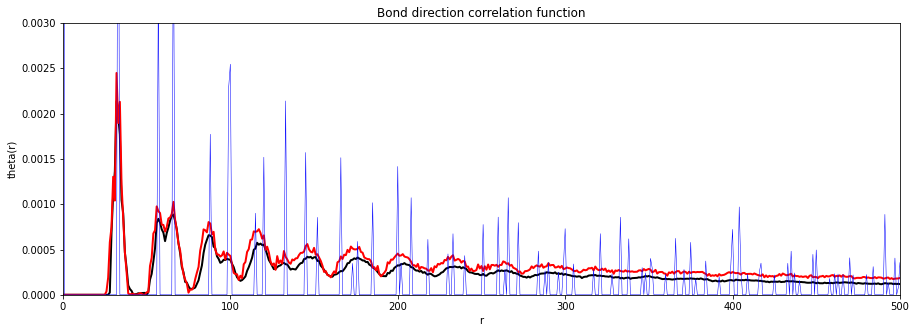

In [67]:
plt.figure(figsize = (15,5))
plt.xlim([0, 500])
plt.ylim([0, .003])
plt.xlabel("r")
plt.ylabel("theta(r)")
plt.title('Bond angle correlation function')
plt.plot(thetaaverageBig, 'k', linewidth=2, label='Big bubble raft')
plt.plot(thetaaverageSmall, 'r', linewidth=2, label='Small bubble raft')
plt.plot(50*thetaaverageLattice, 'b', linewidth=0.5, label='Perfect crystal')